Notes and code from "Bayesian Analysis with Python" (Chapter 1)

## Data

We want to estimate the bias of a coin. We observe a sequence of experiments. For each experiment we know the number of trials and the number of heads.

In [8]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

## Model Specification

In Bayesian modeling we need to choose a **likelihood** and for each of its parameters a **prior distribution**. Btw, I wonder how this scales to many parameters?

As likelihood choose $y \sim Bin(N,\theta)$ , ie. that the probability of `y` heads at `N` trials follows the **binomial distribution**. The parameter $\theta$ represents the bias the coins lands head in a single throw.

As prior distribution we choose $\beta\sim Beta(\alpha, \beta)$. One reason the **beta distribution** is popular in Bayesian Analysis is because it can **model many different shapes** such as uniform, Gaussian, or U-like. Lets plot the probability density function for different values of $\alpha$ and $\beta$ to learn how to express different forms of belief.

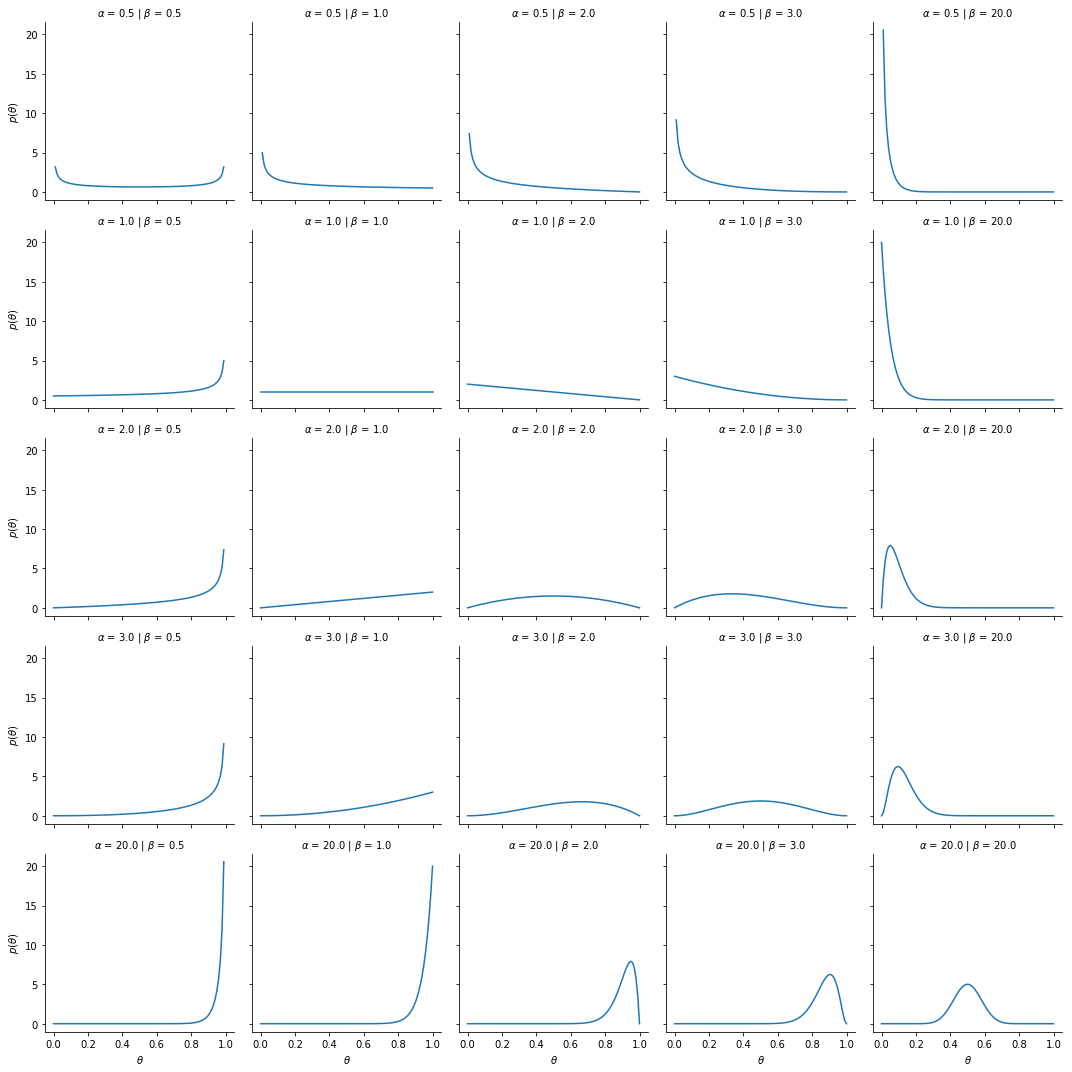

In [7]:
# possible values (same for both parameters)
params = np.array([0.5, 1, 2, 3,20])

# nice, we can render greek letters and other TeX commands in matplotlib charts
alpha, beta, theta, p_theta = '$\\alpha$', '$\\beta$', '$\\theta$', '$p(\\theta)$'

# we want the density at x=1,...,100 for different parameter combinations
idx = pd.MultiIndex.from_product(
    [params,params,np.linspace(0, 1, 100)]
    , names=(alpha,beta,theta)
)

# Create dataframe with densities
df = pd.DataFrame(
    [stats.beta(a,b).pdf(x) for (a,b,x) in idx]
    , index=idx
    , columns=[p_theta]
)

# grid plot densities using seaborn
g = sns.FacetGrid(df.reset_index(), row=alpha, col=beta)
g.map(sns.lineplot, theta, p_theta)

Another reason the Beta Distribution is popular is that it's a conjugate prior for the popular likelihood functions such as Bernoulli, binomial, negative binomial and geometric. If we plug the formulas for the beta distribution and the binomial distribution into $p(\theta|y) \propto p(\theta|y)\ p(\theta)$ we get

$$p(\theta|y)\sim Beta(\alpha_{prior}+y,\beta_{prior}+N-y).$$

How, beautiful and simple! For a baseball example of this property check out [stackexchange](https://stats.stackexchange.com/questions/47771/what-is-the-intuition-behind-beta-distribution).

NameError: name 'data' is not defined

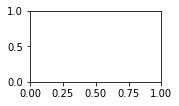

In [4]:

# model prior via beta distribution
prior = stats.beta

# Compare different priors
prior_params = [(1, 1), (0.5, 0.5), (20, 20)]

# we want the density at x=1,...,100 for different parameter combinations
idx = pd.MultiIndex.from_product(
    [params,params,np.linspace(0, 1, 100)]
    , names=(alpha,beta,theta)
)


x = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(8, 6))

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r'$\theta$')
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()


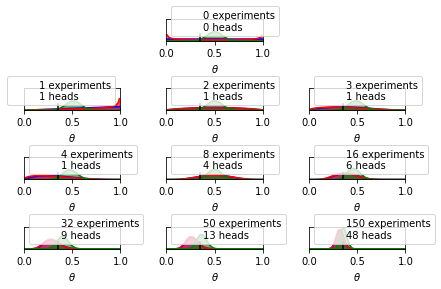

In [14]:


beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r'$\theta$') 
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()